In [72]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

from Features import *
from AttributeRelevance import *

In [79]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  

In [93]:
df = pd.read_csv('data/telco_churn.csv', na_values=[' '])

In [95]:
df.columns = [c[0].lower() + c[1:] for c in df.columns]
df['label'] = df['churn'].map({'Yes': 1, 'No': 0})
df['seniorCitizen'] = df['seniorCitizen'].map({1: 'Yes', 0: 'No'})
df.drop(['customerID', 'churn'], axis=1, inplace=True)

In [96]:
df.sample(5)

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,label
3543,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),105.60,"7,581.50",0
3918,Male,No,Yes,Yes,20,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.20,"1,776.55",1
508,Female,No,Yes,Yes,6,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,80.50,502.85,1
1455,Female,No,Yes,No,36,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),106.05,"3,834.40",0
4810,Female,Yes,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,89.85,"1,424.95",1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
seniorCitizen       7043 non-null object
partner             7043 non-null object
dependents          7043 non-null object
tenure              7043 non-null int64
phoneService        7043 non-null object
multipleLines       7043 non-null object
internetService     7043 non-null object
onlineSecurity      7043 non-null object
onlineBackup        7043 non-null object
deviceProtection    7043 non-null object
techSupport         7043 non-null object
streamingTV         7043 non-null object
streamingMovies     7043 non-null object
contract            7043 non-null object
paperlessBilling    7043 non-null object
paymentMethod       7043 non-null object
monthlyCharges      7043 non-null float64
totalCharges        7032 non-null float64
label               7043 non-null int64
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [98]:
feats_dict = {}

for col in [c for c in df.columns if c != 'label']:
    if is_numeric_dtype(df[col]):
        feats_dict[col] = ContinuousFeature(df, col)
    else:
        feats_dict[col] = CategoricalFeature(df, col)

feats = list(feats_dict.values())

In [75]:
#categorical = ['gender', 'seniorCitizen', 'partner', 'dependents', 'phoneService', 'multipleLines', 'internetService', 'onlineSecurity', 'onlineBackup', 'deviceProtection', 'techSupport', 'streamingTV', 'streamingMovies', 'contract', 'paperlessBilling', 'paymentMethod']
#continuous = ['tenure', 'monthlyCharges', 'totalCharges']

In [100]:
iv = IV()
s = StatsSignificance()

ar = AttributeRelevance()

In [101]:
ar.analyze(feats, iv, s, interpretation=True)

,iv,p-value,effect_size,iv_interpretation,es_interpretation
contract,1.24,0.00,0.41,suspicious,strong
tenure,0.85,0.00,0.38,suspicious,medium
onlineSecurity,0.72,0.00,0.35,suspicious,medium
techSupport,0.70,0.00,0.34,suspicious,medium
internetService,0.62,0.00,0.32,suspicious,medium
onlineBackup,0.53,0.00,0.29,suspicious,medium
deviceProtection,0.50,0.00,0.28,strong,medium
paymentMethod,0.46,0.00,0.30,strong,medium
streamingMovies,0.38,0.00,0.23,strong,medium
streamingTV,0.38,0.00,0.23,strong,medium


In [104]:
def evaluate_feature(feature):
    iv.draw_woe(feats_dict[feature])
    iv.print_iv(feats_dict[feature])
    print('')
    s.print_chi(feats_dict[feature])

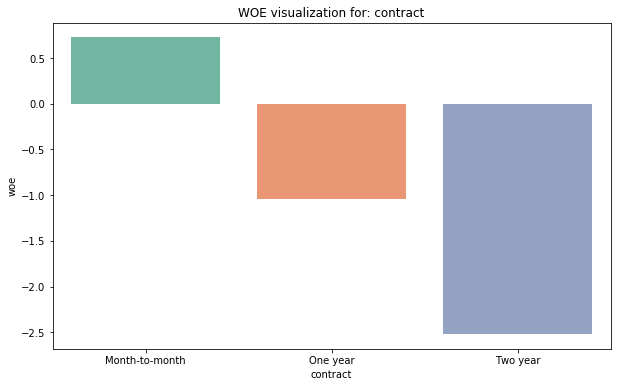

Information value: 1.24
Contract is a suspicious predictor

P-value: 0.00
Effect size: 0.41
Contract is a strong predictor


In [105]:
evaluate_feature('contract')

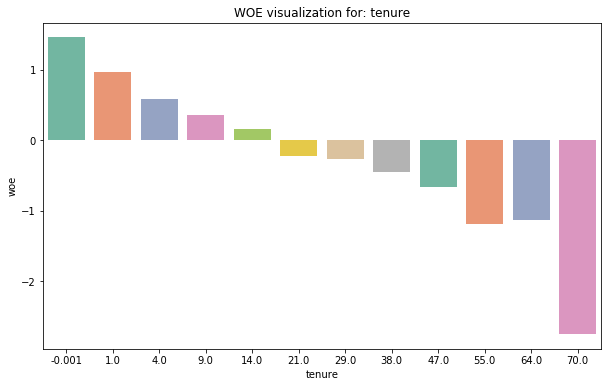

Information value: 0.85
Tenure is a suspicious predictor

P-value: 0.00
Effect size: 0.38
Tenure is a medium predictor


In [106]:
evaluate_feature('tenure')

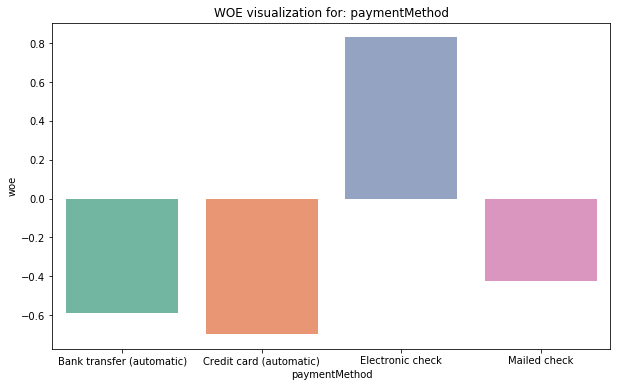

Information value: 0.46
Paymentmethod is a strong predictor

P-value: 0.00
Effect size: 0.30
Paymentmethod is a medium predictor


In [109]:
evaluate_feature('paymentMethod')

In [111]:
iv.group_by_feature(feats_dict['paymentMethod'])

,paymentMethod,count,good,bad
0,Bank transfer (automatic),1544,258,1286
1,Credit card (automatic),1522,232,1290
2,Electronic check,2365,1071,1294
3,Mailed check,1612,308,1304


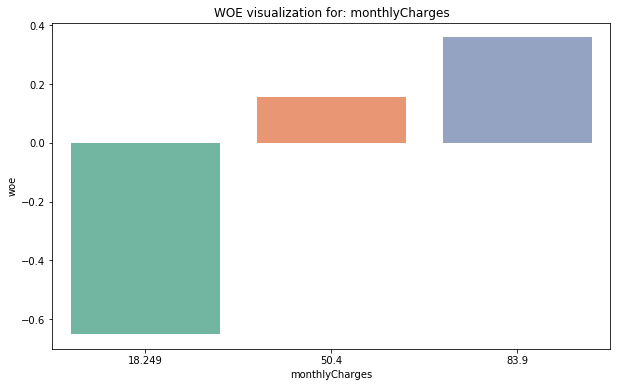

Information value: 0.17
Monthlycharges is a medium predictor

P-value: 0.00
Effect size: 0.18
Monthlycharges is a weak predictor


In [116]:
evaluate_feature('monthlyCharges')

* customerIDCustomer ID
* genderWhether the customer is a male or a female
* SeniorCitizenWhether the customer is a senior citizen or not (1, 0)
* PartnerWhether the customer has a partner or not (Yes, No)
* DependentsWhether the customer has dependents or not (Yes, No)
* tenureNumber of months the customer has stayed with the company
* PhoneServiceWhether the customer has a phone service or not (Yes, No)
* MultipleLinesWhether the customer has multiple lines or not (Yes, No, No phone service)
* InternetServiceCustomer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurityWhether the customer has online security or not (Yes, No, No internet service)
* OnlineBackupWhether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtectionWhether the customer has device protection or not (Yes, No, No internet service)
* TechSupportWhether the customer has tech support or not (Yes, No, No internet service)
* StreamingTVWhether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMoviesWhether the customer has streaming movies or not (Yes, No, No internet service)
* ContractThe contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBillingWhether the customer has paperless billing or not (Yes, No)
* PaymentMethodThe customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyChargesThe amount charged to the customer monthly
* TotalChargesThe total amount charged to the customer
* ChurnWhether the customer churned or not (Yes or No)